In [11]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.quantum_info.operators import Operator

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

## Uf

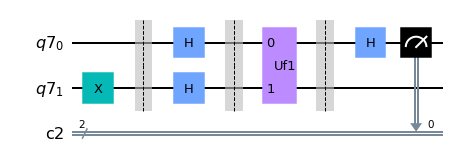

In [12]:
# Creating registers
qr = QuantumRegister(2)
# classical registers for recording the measurement on qr
cr = ClassicalRegister(2)

deuCircuit = QuantumCircuit(qr, cr)
barriers = True

# initialize the ancilla qubit in the |1> state
deuCircuit.x(qr[1])

# Apply barrier 
if barriers:
    deuCircuit.barrier()

# Apply Hadamard gates before querying the oracle
deuCircuit.h(qr[0])    
deuCircuit.h(qr[1])    

# Apply barrier 
if barriers:
    deuCircuit.barrier()

#Apply quantum oracle
# Build your gate with Operator and unitary function
uf1 = Operator([ # cx
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]])

uf2 = Operator([
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1]])

uf3 = Operator([ # I
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]])

uf4 = Operator([
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1]])


# Query the oracle 
deuCircuit.unitary(uf1, [qr[0], qr[1]], label='Uf1')
#deuCircuit.unitary(uf2, [qr[0], qr[1]], label='Uf2')
#deuCircuit.unitary(uf3, [qr[0], qr[1]], label='Uf3')
#deuCircuit.unitary(uf4, [qr[0], qr[1]], label='Uf4')

# Apply barrier 
if barriers:
    deuCircuit.barrier()

# Apply Hadamard gates after querying the oracle
deuCircuit.h(qr[0])    
 

# Measure the input qubit
deuCircuit.measure(qr[0], cr[0])

deuCircuit.draw(output='mpl')

## Experiment with Simulators

c0 = 1 (1024 shots)


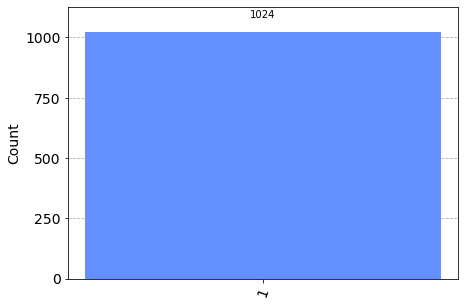

In [13]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(deuCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

# categorize answers to c0 = 0 and c0 = 1
answer_c0 = {}
for c1c0 in answer:
    print('c0 = {} ({} shots)'.format(c1c0[1], answer[c1c0]))

    if c1c0[1] in answer_c0:
        answer_c0[c1c0[1]] += answer[c1c0]
    else:
        answer_c0[c1c0[1]] = answer[c1c0]

plot_histogram(answer_c0)

As we can see, the only measured value is $c_0=0$, indicating that $f(0)=f(1)$

## Experiment with Real Devices

In [14]:
mytoken="nah secret"
IBMQ.save_account(mytoken, overwrite=True)
# Load our saved IBMQ accounts and get the least busy backend device that we are allowed to use
IBMQ.load_account()
#IBMQ.backends()
provider=IBMQ.get_provider(group='open')
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("Least busy backend: ", backend_lb)

ibmqfactory.load_account:WARNING:2023-03-24 09:26:43,196: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend:  ibmq_manila


In [15]:
from qiskit.tools.monitor import job_monitor

backend = backend_lb
shots = 1024
job_exp = execute(deuCircuit, backend=backend, shots=shots)

job_monitor(job_exp, interval = 2)

Job Status: job has successfully run


c0 = 0 (55 shots)
c0 = 1 (969 shots)
{'0': 55, '1': 969}


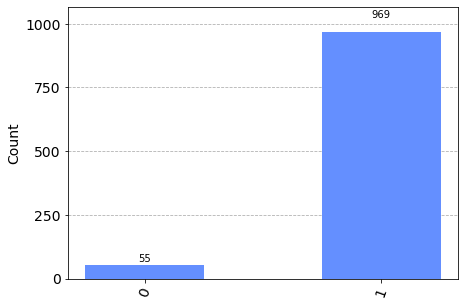

In [17]:
results = job_exp.result()
answer = results.get_counts(deuCircuit)

# categorize answers to c0 = 0 and c0 = 1
answer_c0 = {}
for c1c0 in answer:
    print('c0 = {} ({} shots)'.format(c1c0[1], answer[c1c0]))
    if c1c0[1] in answer_c0:
        answer_c0[c1c0[1]] += answer[c1c0]
    else:
        answer_c0[c1c0[1]] = answer[c1c0]

# show answers
print(answer_c0)
plot_histogram(answer_c0)